
<span><br><font size=5>Crawling <span style="color:green">Pe</span><span style="color:silver">rs</span><span style="color:red">ian</span> websites with Python
<span><br><font size=3>A Hands-On tutorial</font></span>
<span><br><font size=3>Fall 2021</font></span>

<span style="color:gray">Originally created as an assignment for Data Analytics & Visualization course(Dr. Amin Sadeghi), University of Tehran.
</span>
<br>
Now for public use.
    

<hr />
<font size=3>Ask your questions from  <a href="mailto:yara.mohamadi@gmail.com">Yara Mohamadi</a> :D<br></font><br>


<pre>
$ ( click to jump on task )
.
├── Introduction
│   └── Jupyter hack!!
│
├── Working with Beautiful Soup
│   └── Searching with Beautiful Soup
│ 
├── <a href="#Task1">Task1: Football Table</a>
│
├── <a href="#Task2">Task2: Digikala Laptop Search</a>
│   └── <a href="#Task2:clean">cleaning the table</a>
│
├── Working with Selenium
│   └── Selenium Webdriver basics
│       ├─ Another example
│       └─ Waits
│
└── <a href="#Task3">Task3: Extracting ticket information</a>
    ├── <a href="#Task3:crawl">Crawling Alibaba & Mrbilit</a>
    └── <a href="#Task3:clean">Cleaning & Joining the Tables</a> <b><span style="color:green">!!Extra Score!! </span></b>


</pre>


<hr />

# Introduction

In this Hands-On excercise, you will become familiar with these concepts:
- Web Scraping & Data Collection using Requests, Beautiful Soup & Selenium libraries
- Data Cleaning

<hr />

<span style="color:green">This Hands-On excersize is partially inspired by this awesome free Persian <b><a  href=https://programming.tosinso.com/fa/videos/8506/%D8%AF%D9%88%D8%B1%D9%87-%D8%A2%D9%85%D9%88%D8%B2%D8%B4%DB%8C-%D8%B1%D8%A7%DB%8C%DA%AF%D8%A7%D9%86-Web-Scraping-%D8%A8%D8%A7-%D8%B2%D8%A8%D8%A7%D9%86-%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87-%D9%86%D9%88%DB%8C%D8%B3%DB%8C-%D9%BE%D8%A7%DB%8C%D8%AA%D9%88%D9%86 > course</a></b> by <b>Mr. Hossein Khorang</b>. Please check it out for a more insight. </span>

<hr />

### Jupyter hack!! 

Run the code below. Now by clicking TAB when writing code, you get a list of all functions and objects and you can enjoy auto completion. I recommend going wild with this feature and using it always! You can also use SHIFT + TAB in front of any function or variable to see its information.

In [29]:
%config Completer.use_jedi = False

<hr />

# Working with Beautiful Soup

We can send a GET request to any webpage and get frontend's source code. Raw source code is usually messy and difficult to parse...

<b><span style="color:Red">You might encounter difficulties sending a Request to Iranian websites using <span style="color:Green">Google Colab</span>. This is because Colab uses a Foreign IP and It gets blocked when trying to access these websites. Please use <span style="color:Green">Jupyter Notebook</span> for this Hands-On exercise. </span></b>

In [ ]:
import requests

url = 'https://python.org'
response = requests.get(url)

print(response.encoding)
print(response.apparent_encoding)

print(response.text)

<hr />

All you need is a <b><span style="color:green">beautiful soup</span></b>! 

<b><span style="color:green">Beautiful soup</span></b> is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.

Please install it in your conda environment: <br>

In [ ]:
!conda install -y -c anaconda beautifulsoup4

In [ ]:
from bs4 import BeautifulSoup

# beautiful soup takes the source code and a parser as input
soup = BeautifulSoup(response.text, 'html.parser')

print(soup)

Much prettier, eh?


These HTML tags are exactly what you see when you press F12 on a webpage.
more specifically, when you right click and inspect an element in a webpage, you can see which tag it belongs to! try it for yourself! In <b>www.python.org</b>, inspecting <b>Community</b> should look like this:

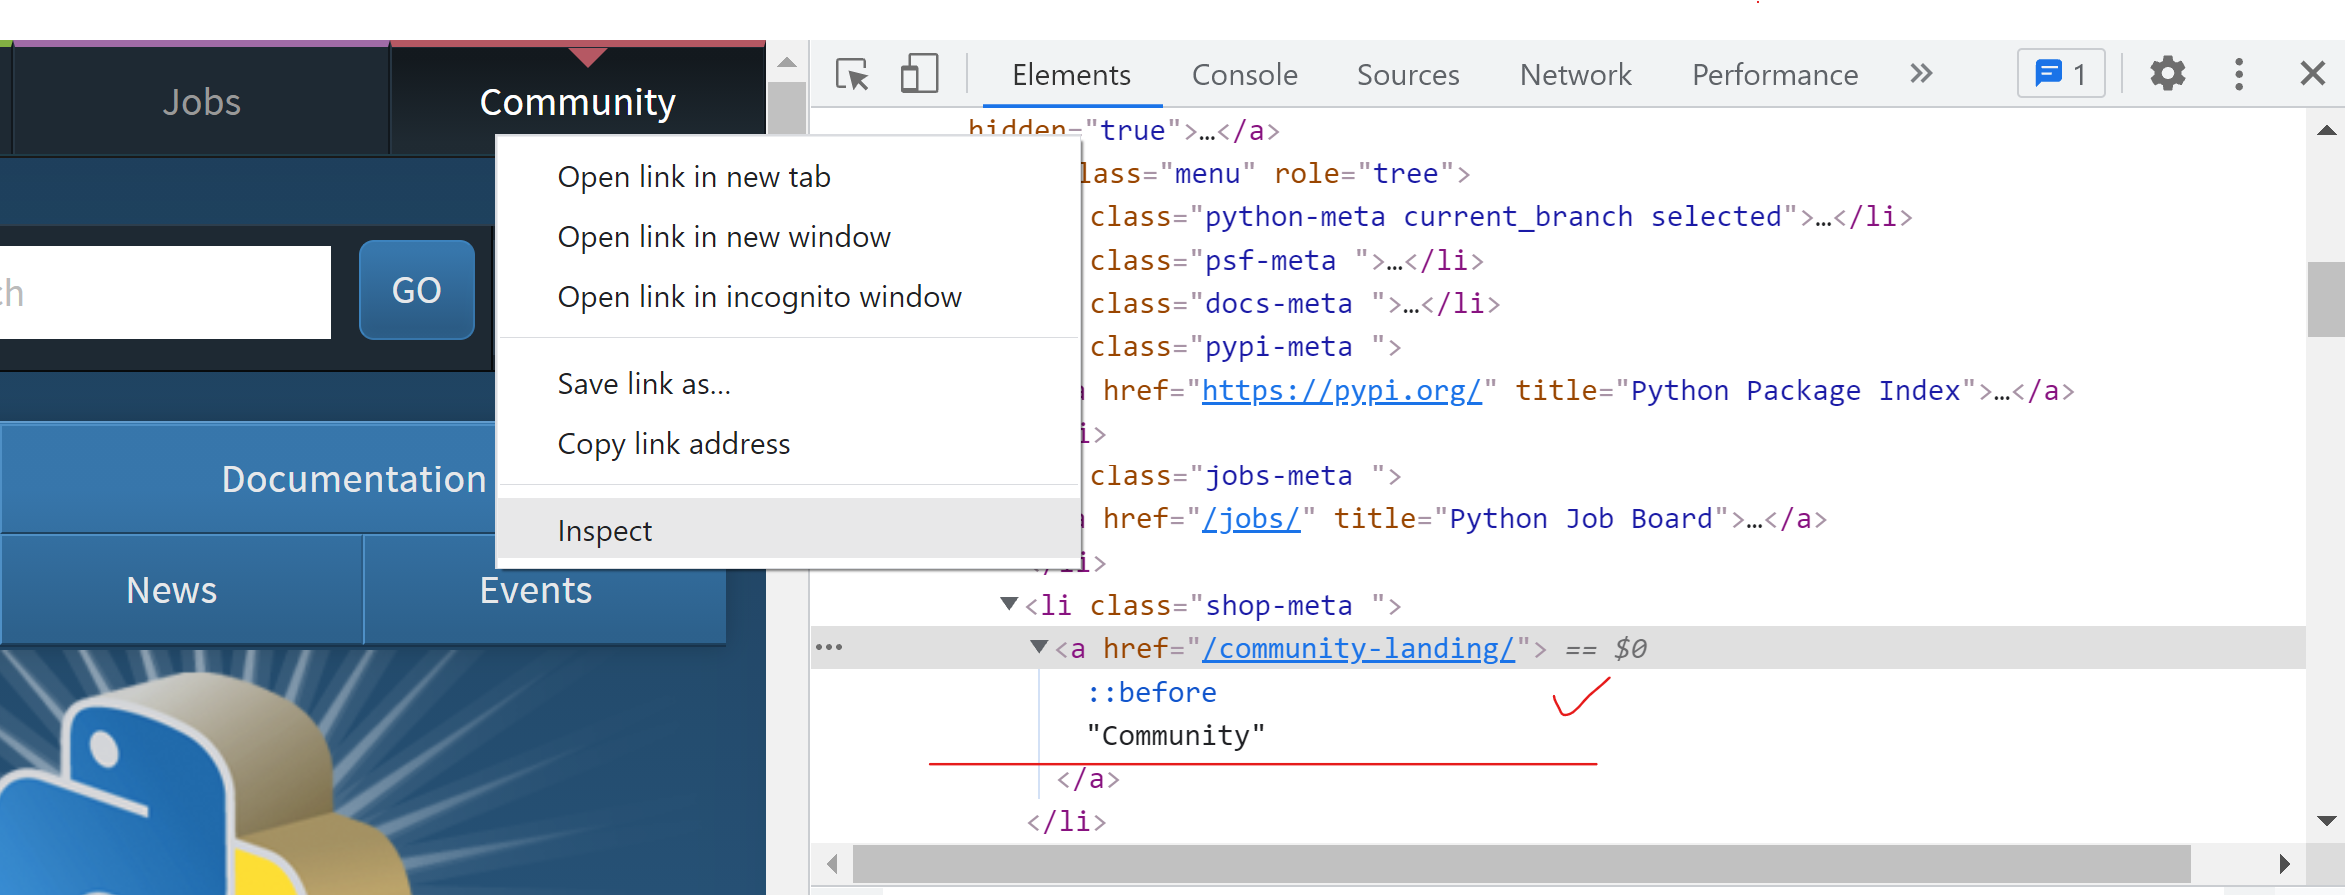

We can see which tag this element belongs to (<a\> inside a <li\> tag). We can also see its attributes (the link (href) it goes to) and its text value ('Community').
<hr />

### Searching with Beautiful Soup

<b><span style="color:green">Beautiful soup</span></b> allows you to search through the source code by tag names and their attributes. The code below finds the first <a\> tag which satisfies the given conditions.


In [7]:
# Can add any attributes we want to the function

print(soup.find('a', href="/community-landing/"))

print(soup.find('a', title="Skip to content", text='Skip to content'))

<a href="/community-landing/">Community</a>
<a href="#content" title="Skip to content">Skip to content</a>


<hr />

What if we need to find all elements that satisfy a condition?

In [ ]:
a = soup.findAll('a')
a

<hr />

What if we want to access their attributes?

In [ ]:
for i in a:
    print(i['href'])

<hr />

You can use ```select_one``` and ```select``` in a similar fasion to ```find``` and ```findAll```, but these functions are more powerful. They allow defining complex conditions by <b><span style="color:green">CSS</span></b> syntax!

for example, the first line below finds the first <b><div\></b> with <b>id='nojs'</b> which is inside another <b><div\></b>. The second line finds all <b><div\>s</b> with <b>class='do-not-print'</b> inside another <b><div\></b>.

Check out the documentation for more awesome tricks!

In [12]:
show = soup.select_one('div > div#nojs')
#show = soup.select('div > div.do-not-print')

show

<div class="do-not-print" id="nojs">
<p><strong>Notice:</strong> While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. </p>
</div>

<hr />

What if we want to access the text?

In [13]:
show.text

'\nNotice: While JavaScript is not essential for this website, your interaction with the content will be limited. Please turn JavaScript on for the full experience. \n'

<hr />

## Task1: Football table

<a name="Task1"></a>

The goal of this exercise is to familiarize you more with Inspecting HTML source codes by extracting information from a table.

- Please visit this <b>[link](https://www.varzesh3.com/table/%d8%ac%d8%af%d9%88%d9%84-%d9%84%d9%8a%da%af-%d8%a8%d8%b1%d8%aa%d8%b1-%d8%a7%db%8c%d8%b1%d8%a7%d9%86-00-99)</b> and choose any other table of your choosing within varzesh3.com (Not the one provided) to work with.

<b><span style="color:red">When working with Persian letters, sometimes <b><span style="color:green">requests</span></b> can get the encoding wrong and show strange characters. If this happens, restart the kernel and run the code again</span></b>


In [ ]:
import requests
from bs4 import BeautifulSoup

''' Replace the URL to your table here'''
url = 'https://www.varzesh3.com/table/%d8%ac%d8%af%d9%88%d9%84-%d9%84%d9%8a%da%af-%d8%a8%d8%b1%d8%aa%d8%b1-%d8%a7%db%8c%d8%b1%d8%a7%d9%86-00-99'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
table 

- By inspecting these tag names in the webpage youre trying to crawl, give a short description of what they represent:

 - ```<thead\>```: 
 - ```<tr\>```:
 - ```<th\>```:
 - ```<tbody\>```:
 - ```<td\>```:

<hr />

- Explain what this code is doing: 

.


In [15]:
rows = table.find_all('tr')
for row in rows:
    for head in row.find_all('th'):
        print([head.text])

['\r\n                ليگ برتر لیگ برتر ایران\r\n            ']
['']
['تيم']
['بازيها']
['برد']
['مساوی']
['باخت']
['گل زده']
['گل خورده']
['تفاضل گل']
['امتياز']
['']


<hr />

- Explain what this code is doing: 

.

In [ ]:
for row in rows:        
    for body in row.find_all('td'):
        print([body.text])


As you see, some of the lines have extra spacings, or extra characters like "\n" & "\r". We can use ```replace('a', 'b')``` and ```strip()``` functions on any string to deal with these. 

<hr />

- Use the following functions to remove these extra characters from the table in the code below.

In [ ]:
rows = table.find_all('tr')

datas = []

for row in rows:
    data = []
    for head in row.find_all('th')[:10]:
        h = head.text
        
        ''' Enter your code here'''
        
        
        data.append(h)
    for body in row.find_all('td')[:10]:
        b = body.text
        
        ''' Enter your code here'''
        
        
        data.append(b)
    datas.append(data)
    
datas

<hr />

- Convert ```datas``` to a pandas DataFrame with proper column names & no empty rows or columns and all numbers as integers. 

In [19]:
import pandas as pd

''' Enter your code here'''

' Enter your code here'

<hr />

- Run these 2 code blocks

In [ ]:
df.head()

In [ ]:
df.info()

<hr />

# Task2: Digikala laptop search

<a name="Task2"></a>

Now let's search for a nice new laptop in digikala. :) <br />
Below you can see the URL of the first page in the laptop section, sorted by the most viewed. <br />
https://www.digikala.com/search/category-notebook-netbook-ultrabook/?pageno=1&sortby=4

if we want to crawl laptops from all pages, we should change the URL accordingly.
In this example, we want to crawl the first 20 pages.

Crawling 20 pages might take a while to finish, so begin with just a few pages and increase the number when you're sure about your code. Using ```tqdm``` library helps by showing a progress bar! install it with ```pip``` or ```conda``` before running the code below.

Your tasks are as follows:
- Open the URL above and Inspect the laptops and their elements like price, title, stars... to familiarize yourself with them.
- Change the pages by manipulating the URL in the ```For``` loop below
- Add code to crawl number of reviews (engagement) & stars too
- Please apply no preprocessing or data cleaning! Just save the texts

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas
from tqdm import tqdm

url = 'https://www.digikala.com/search/category-notebook-netbook-ultrabook/?pageno='

titles = []
engagements = []
stars = []
prices = []

for page in tqdm(range(1, 21)):
    
    '''' Enter your code here to Change the URL page '''
    new_url = 'what?'
    
    page = requests.get(new_url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # Get name of product
    title = soup.select('div.c-product-box__content--row')
    for t in title:
        name = t.text
        titles.append(name)
        
    # Get price of product
    priceBoxes = soup.findAll('div', {'class': 'c-price__value c-price__value--plp js-plp-product-card-price'})
    for each_price in priceBoxes:
        # a PriceBox is containing initial price, discount %, and final price, we want only the final price
        price = each_price.find('div', {'class': 'c-price__value-wrapper'})
        price = price.text
        prices.append(price)

        
    ''' Enter your code here to get engagement number'''
    
    
    
    ''' Enter your code here to get star number'''
    
    
    
    
# Saving info in a dictionary
product = {'Title': titles, 'Engagements': engagements, 'Stars': stars, 'Prices': prices}
# Saving dictionary in a dataframe
data = pandas.DataFrame.from_dict(product, orient='index')
data = data.transpose()
data

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:33<00:00,  1.70s/it]


Title  \
0    لپ تاپ 15 اینچی ایسوس مدل VivoBook R521JA-BQ08...   
1    لپ تاپ 15 اینچی لنوو مدل Ideapad 330 - ELenovo...   
2    لپ تاپ 15.6 اینچی ایسوس مدل X543MA-GQ1013ASUS ...   
3    لپ تاپ ۱۵.۶ اینچی ایسوس مدل VivoBook R565MA-BR...   
4    لپ تاپ 15.6 اينچی دل مدل Alienware M15 R3 GAMI...   
..                                                 ...   
715  لپ تاپ 15 اینچی لنوو مدل Ideapad L3 - BCLenovo...   
716  لپ تاپ 17 اینچی ایسوس مدل TUF GAMING FX706IUAS...   
717  لپ تاپ 15.6 اینچی ایسوس مدل K513EQ-BQ112ASUS K...   
718  لپ تاپ 15.6 اینچی لنوو مدل IdeaPad Gaming 3 15...   
719   لپ تاپ 14 اینچی ایسوس مدل Zenbook UX434FQ ASU...   

                                                Prices  
0    \n                                    ۱۴,۱۹۹,۰...  
1    \n                                    ۹,۱۹۵,۰۰...  
2    \n                                    ۸,۶۷۰,۰۰...  
3    \n                                    ۱۱,۳۰۰,۰...  
4    \n                                    ۱۰۳,۰۰۰,...  
..                                                 ...  
715                                               None  
716                                               None  
717                                               None  
718                                               None  
719                                               None  

[720 rows x 2 columns]

<hr />

## Cleaning the table

<a name="Task2:clean"></a>


- Clean the pandas dataframe
 - Price, Star & Engagement should be Int or Float & None values must be replaced with 0
 
 
- Split Title into the 3 columns shown below & remove the original column
 - Size (inches): Float type
 - Brand: Object type
 - Model: Object type
 
You can use any method to do the splitting. I recommend working with <b><span style="color:green">Regex</span></b>! You can play around with your <b><span style="color:green">Regex</span></b> patterns [here](https://regexr.com/)

<b><span style="color:red">Note that some Titles have different formats. You should split the different ones as well. </span></b>

In [ ]:
'''Enter your code here'''

<hr />

- Run these 2 code blocks at the end of your task

In [ ]:
data.info()

In [ ]:
data.head()

<hr />

- Show all ASUS, 15.6 inch Laptops

In [ ]:
'''Enter your code here'''

<hr />

- Sort the Brands by popularity (Do not include 0 Enagement values)

In [ ]:
'''Enter your code here'''

<hr />

- What's the average price for each Size group? (Do not include 0 Price values)

In [ ]:
'''Enter your code here'''

<hr />

# Working with Selenium

Now let's check the flights to your favorite destination in Persian <b>[Alibaba](https://www.alibaba.ir/iranout)</b> and crawl their info.

But wait a minute, this process sounds a little hard for Beautiful Soup! It includes filling interactive forms, and scrolling to generate new tickets. These stuff are handled by JavaScript, but BeautifulSoup only works with a static HTML source code...

We need a more powerful Crawler. We need... <b><span style="color:green">Selenium</span></b>

<hr />

<b><span style="color:green">Selenium</span></b> is an open-source automated testing framework for web applications. Selenium provides a playback tool for authoring functional tests without the need to learn a test scripting language. Working with Selenium requires installing a WebDriver.


<b><span style="color:green">Selenium WebDriver</span></b> is a web framework that permits you to execute cross-browser tests. This tool is used for automating web-based application testing to verify that it performs expectedly. Selenium WebDriver allows you to choose a programming language to create test scripts.

<hr />

- Please install selenium in your conda environment

In [ ]:
!conda install -y -c conda-forge selenium

- Depending on what your browser is, download your webdriver from <b>[here](https://pypi.org/project/selenium/)</b>


- After downloading it, you should extract and move the file to the same directory this file is located in.

you should see your driver with an ```ls``` command: I use chrome so my driver is chromedriver.exe

In [20]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9AE6-C8CB

 Directory of C:\Users\yaram\Untitled Folder\DA_2

10/05/2021  05:14 PM    <DIR>          .
10/05/2021  05:14 PM    <DIR>          ..
10/05/2021  04:55 PM    <DIR>          .ipynb_checkpoints
10/01/2021  06:08 PM        11,232,768 chromedriver.exe
10/05/2021  05:13 PM         3,050,735 Hands_on2-Copy1.ipynb
10/05/2021  04:57 PM    <DIR>          src
               2 File(s)     14,283,503 bytes
               4 Dir(s)  166,464,311,296 bytes free


## Selenium webdriver basics

Now, run this code and watch the magic happen. Pay attention to what is happening in your new browser window and speculate the code. Note that when you open a page, the driver does not proceed until the page has fully loaded, so be patient! your code is working fine. :)

<b><span style="color:red">If you encounter unsolvable issues with browsers other than Chrome, I recommend you to switch to this browser</span></b>

In [21]:
from selenium import webdriver
import time

''' Change this according to your browser'''
driver = webdriver.Chrome()
#driver = webdriver.Firefox()
#driver = webdriver.Edge()
#driver = webdriver.Safari()

# Open this page
driver.get('https://www.alibaba.ir/iranout')

# Go fullscreen
driver.maximize_window()

# After the page has fully loaded, wait 2 seconds
time.sleep(2)

# Open this page
driver.get('https://mrbilit.com/international-flights')

# Go back
driver.back()

time.sleep(2)

# Go forward
driver.forward()

# Close the browser
driver.close()

Pretty neat, eh? :D

<hr />

### Another Example

The code below, opens Google, searches 'Python' & opens the first link, then closes the browser.
The goal of this example is to familiarize you with the basics of Selenium. So play around with this code block and even change stuff until you have grasped the concepts.


Finding elements in <b><span style="color:green">Selenium</span></b> is similar to <b><span style="color:green">Beautiful Soup</span></b>. In the beginning lines of the code below, ```driver.find_element_by_name```</b> is using the name attribute for finding an element. Press TAB after the ```driver.find_element...``` part to see other possibilities. We must choose one of these functions after inspecting our desired element in the source code and according to its attributes. 

The Figure below shows the attributes of the search bar in google. So in the code below, we find it by its name, 'q'.

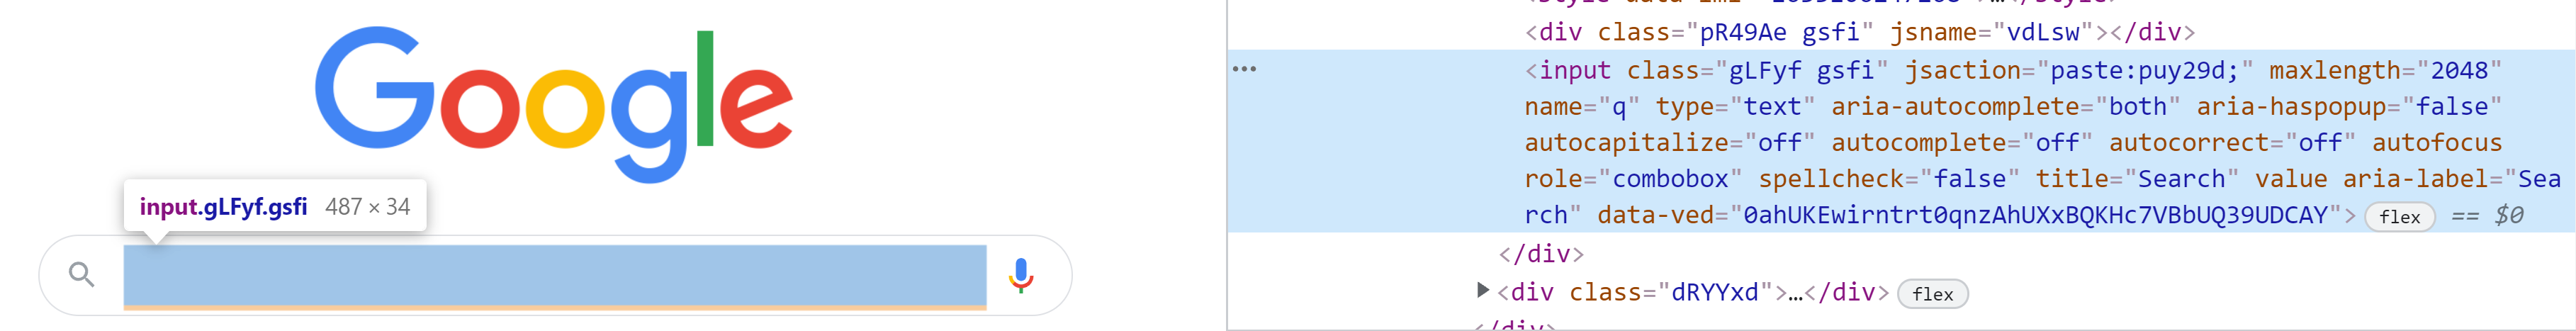

- Find and fill in the class name of the Google search button in the desired part of the code below!
 (You cannot run the code successfully without doing this first)
 
- Run the code after doing this. Don't change anything else

<hr />

You can use <b><span style="color:green">XPath</span></b> when the element does not have any specific attributes, or when its attributes are prone to change in the future. <b><span style="color:green">XPath</span></b> finds the element by its relative location within the tags of an XML or HTML file. The figure below shows how you can get the <b><span style="color:green">XPath</span></b> of the first google search result. You can write your own custom <b><span style="color:green">XPath</span></b> too!

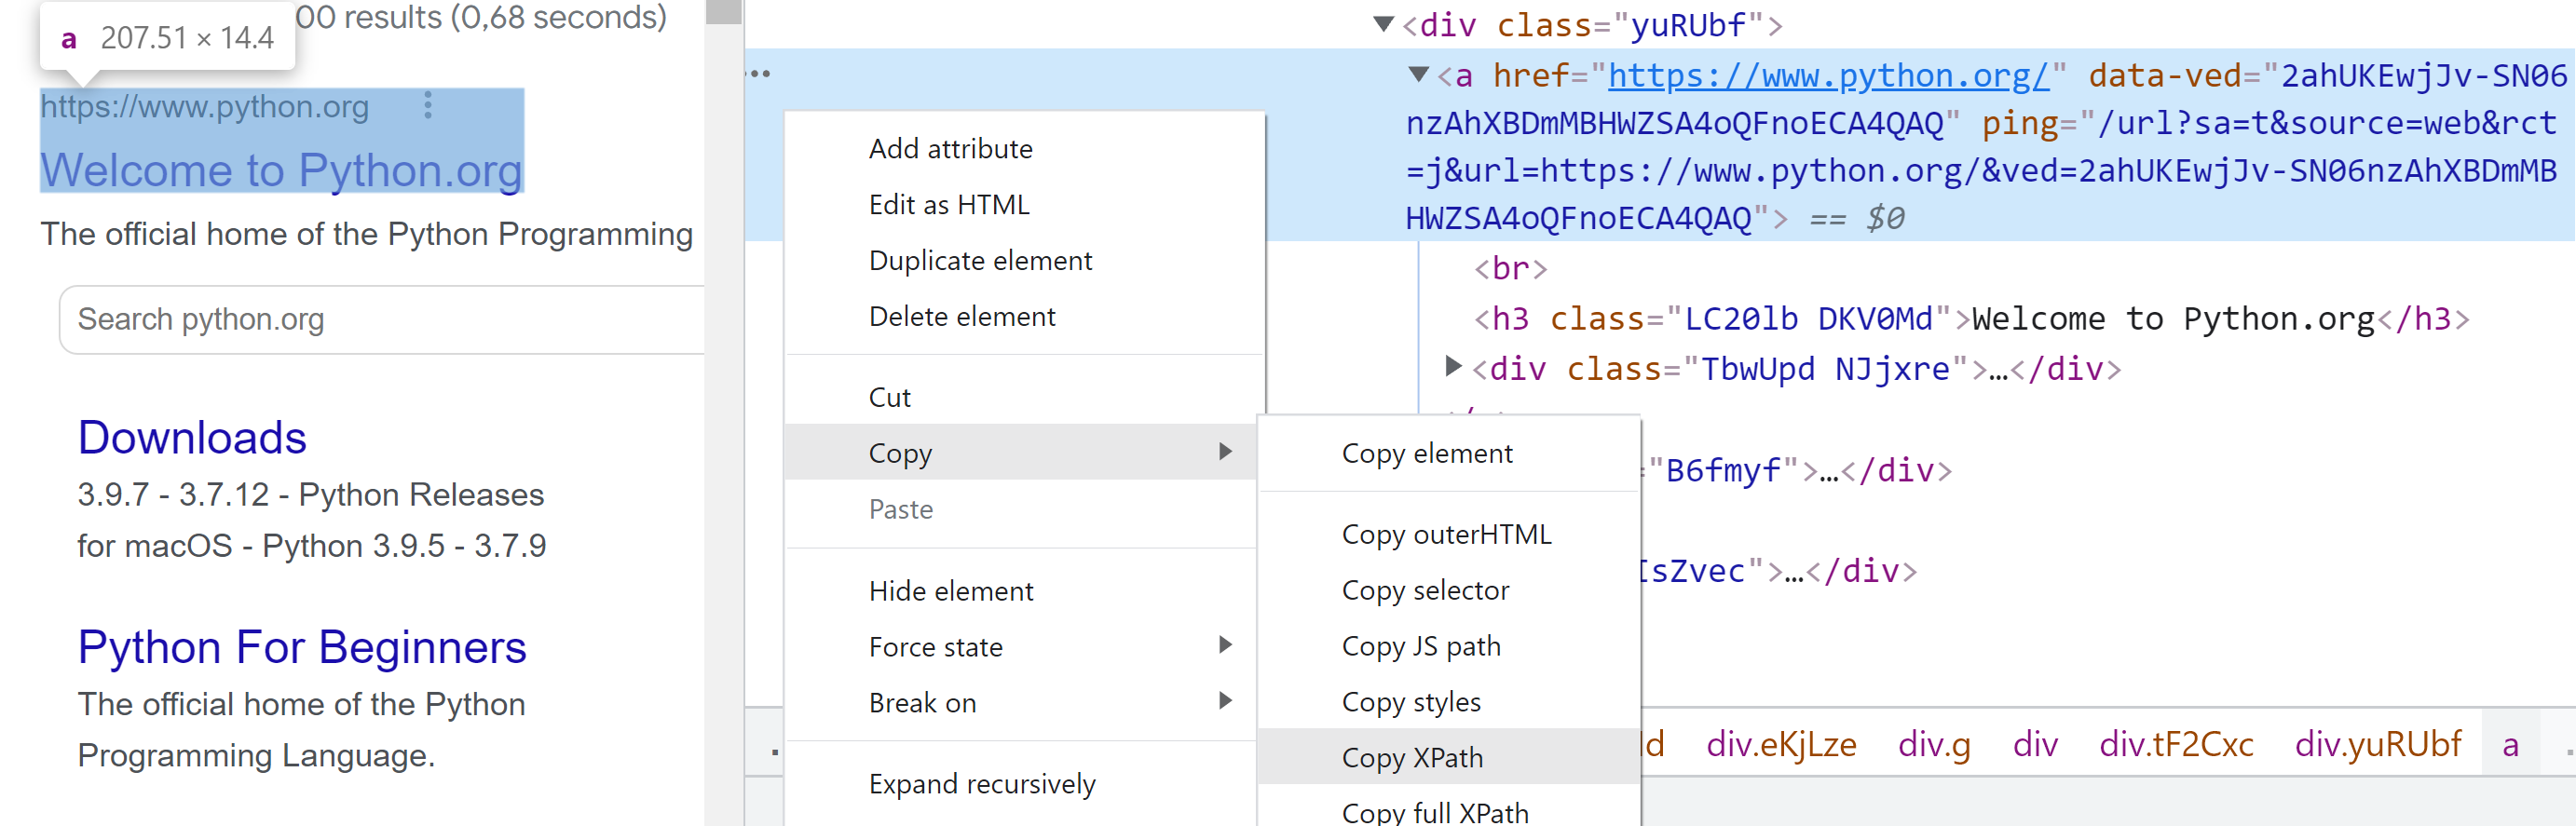

- Find and fill in the XPath of the first link by copying the XPath in the desired part of the code below!

<hr />

Similar to XPath, we can find an element by <b><span style="color:green">CSS selector</span></b> too, which in syntax, is the equivalent of ```select``` and ```select_one``` in Beautiful Soup.
Just simply click on <b>copy selector</b> instead of <b>copy XPath</b>. Similarly, you can write your own CSS selectors too.

- Find and fill in the CSS selector of the first link by copying the selector in the desired part of the code below!


In [22]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome()
driver.get('https://www.google.com/')
driver.maximize_window()

# Find the google search bar by its name 
input_1 = driver.find_element_by_name('q')

# Writes 'python' in the search bar
input_1.send_keys('python')

time.sleep(1)

''' 
Fill the code below to find the google search button by its class name. You cannot run this code without filling this!
'''
btn = driver.find_element_by_class_name('''Enter Class Name here''')

# Clicks on the google search button
btn.click()

''' 
Instead of clicking that button, we could have pressed ENTER too!
Comment out the lines of finding and clicking the search button above and run the line below instead.
See other possible Key presses too by pressing TAB in front of -Keys-
'''
#input_1.send_keys('python' + Keys.ENTER)

time.sleep(1)


''' 
Uncomment only one of the lines below containing -first_link- in each of your runs

Fill this by copying the -XPath- from your browser
'''
#first_link = driver.find_element_by_xpath('''Enter XPath here''').click()

# You can write your custom XPath
first_link = driver.find_element_by_xpath('//a[@href="https://www.python.org/"]').click()

''' 
Fill this by copying the -selector- from your browser
'''
#first_link = driver.find_element_by_css_selector('''Enter CSS selector here''').click()

# You can write your custom CSS selector
#first_link = driver.find_element_by_css_selector('a[href="https://www.python.org/"]').click()

time.sleep(3)

driver.close()

- Now remove the first ```time.sleep(1)``` from the code above and run it again. <br />

you will probably encounter this error: <b><span style="color:red">element not interactable</span></b>


this error happens for 1 of 2 reasons, either there is more than one element with the specified condition, or the element has not fully loaded.

The driver by default does not wait for our writes to finish, or the element to fully load! and its trying to find an item that does not exist yet! we should always make small pauses between our steps.

<hr />

### Waits 

There are better ways to tell the driver to wait too! 

```driver.implicitly_wait(10)``` waits until everything is ready and maximum for 10 seconds.

you can explicitly wait until an expected condition occurs too. ```WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, 'gNO89b')))``` waits either for 10 seconds or for the condition of "element_to_be_clickable" to be True. It introduces a new concept of finding elements too using ```By```! Run the code once with implicit wait, & once with explicit wait.

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome()
driver.get('https://www.google.com/')
driver.maximize_window()

input_1 = driver.find_element_by_name('q')
input_1.send_keys('python')



# Explicit wait ####################################
'''
press tab after -EC- and -By- to see the other possiblities too
'''
btn = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, 'gNO89b')))
btn.click()

# Implicit wait ####################################

#driver.implicitly_wait(10)
#btn = driver.find_element_by_class_name('gNO89b')
#btn.click()



time.sleep(3)

driver.close() 

<hr />

# Task3: Extracting ticket information

<a name="Task3"></a>


Now back to checking tickets! I have already wrote some code to get ticket information! I'm looking for one-way flights from Tehran to Copenhagen on 15th of Azar. 

- Run the code and watch the crawling process. 

- Change the destination & the date!

- Explain in a paragraph, what the code is doing in each section, what information is it crawling, & where does it take each of these information from? :

<b><span style="color:green">your answer here:</span></b>

.

.

.

.

.



<b><span style="color:red"> The course video for this section looks a bit different. It uses the old version of Alibaba website that looks slighty different (First figure). We will work with the new version of Alibaba in your exercise. (Second Figure)
</span></b>




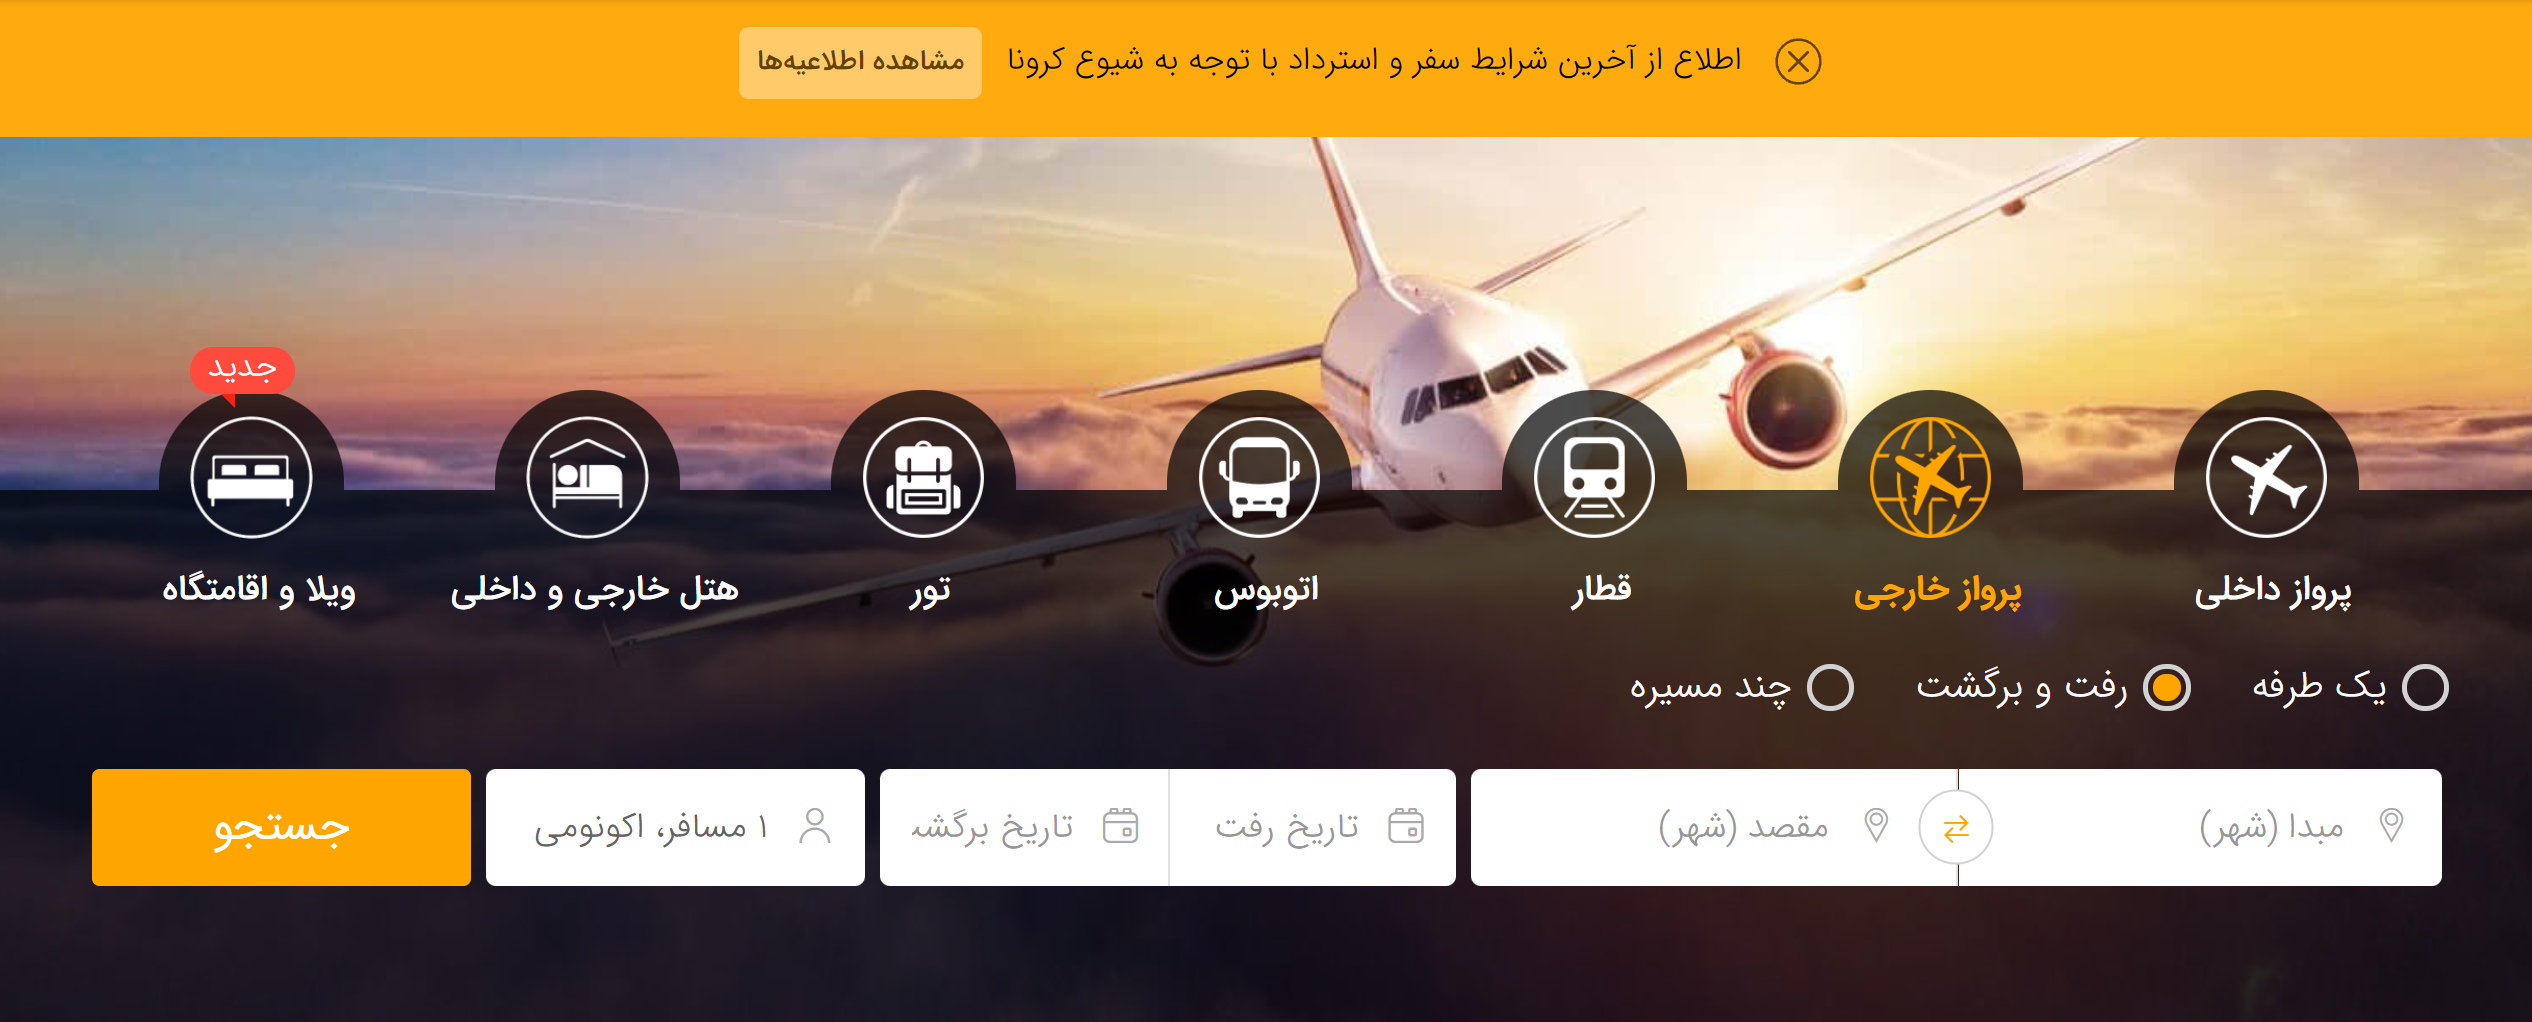

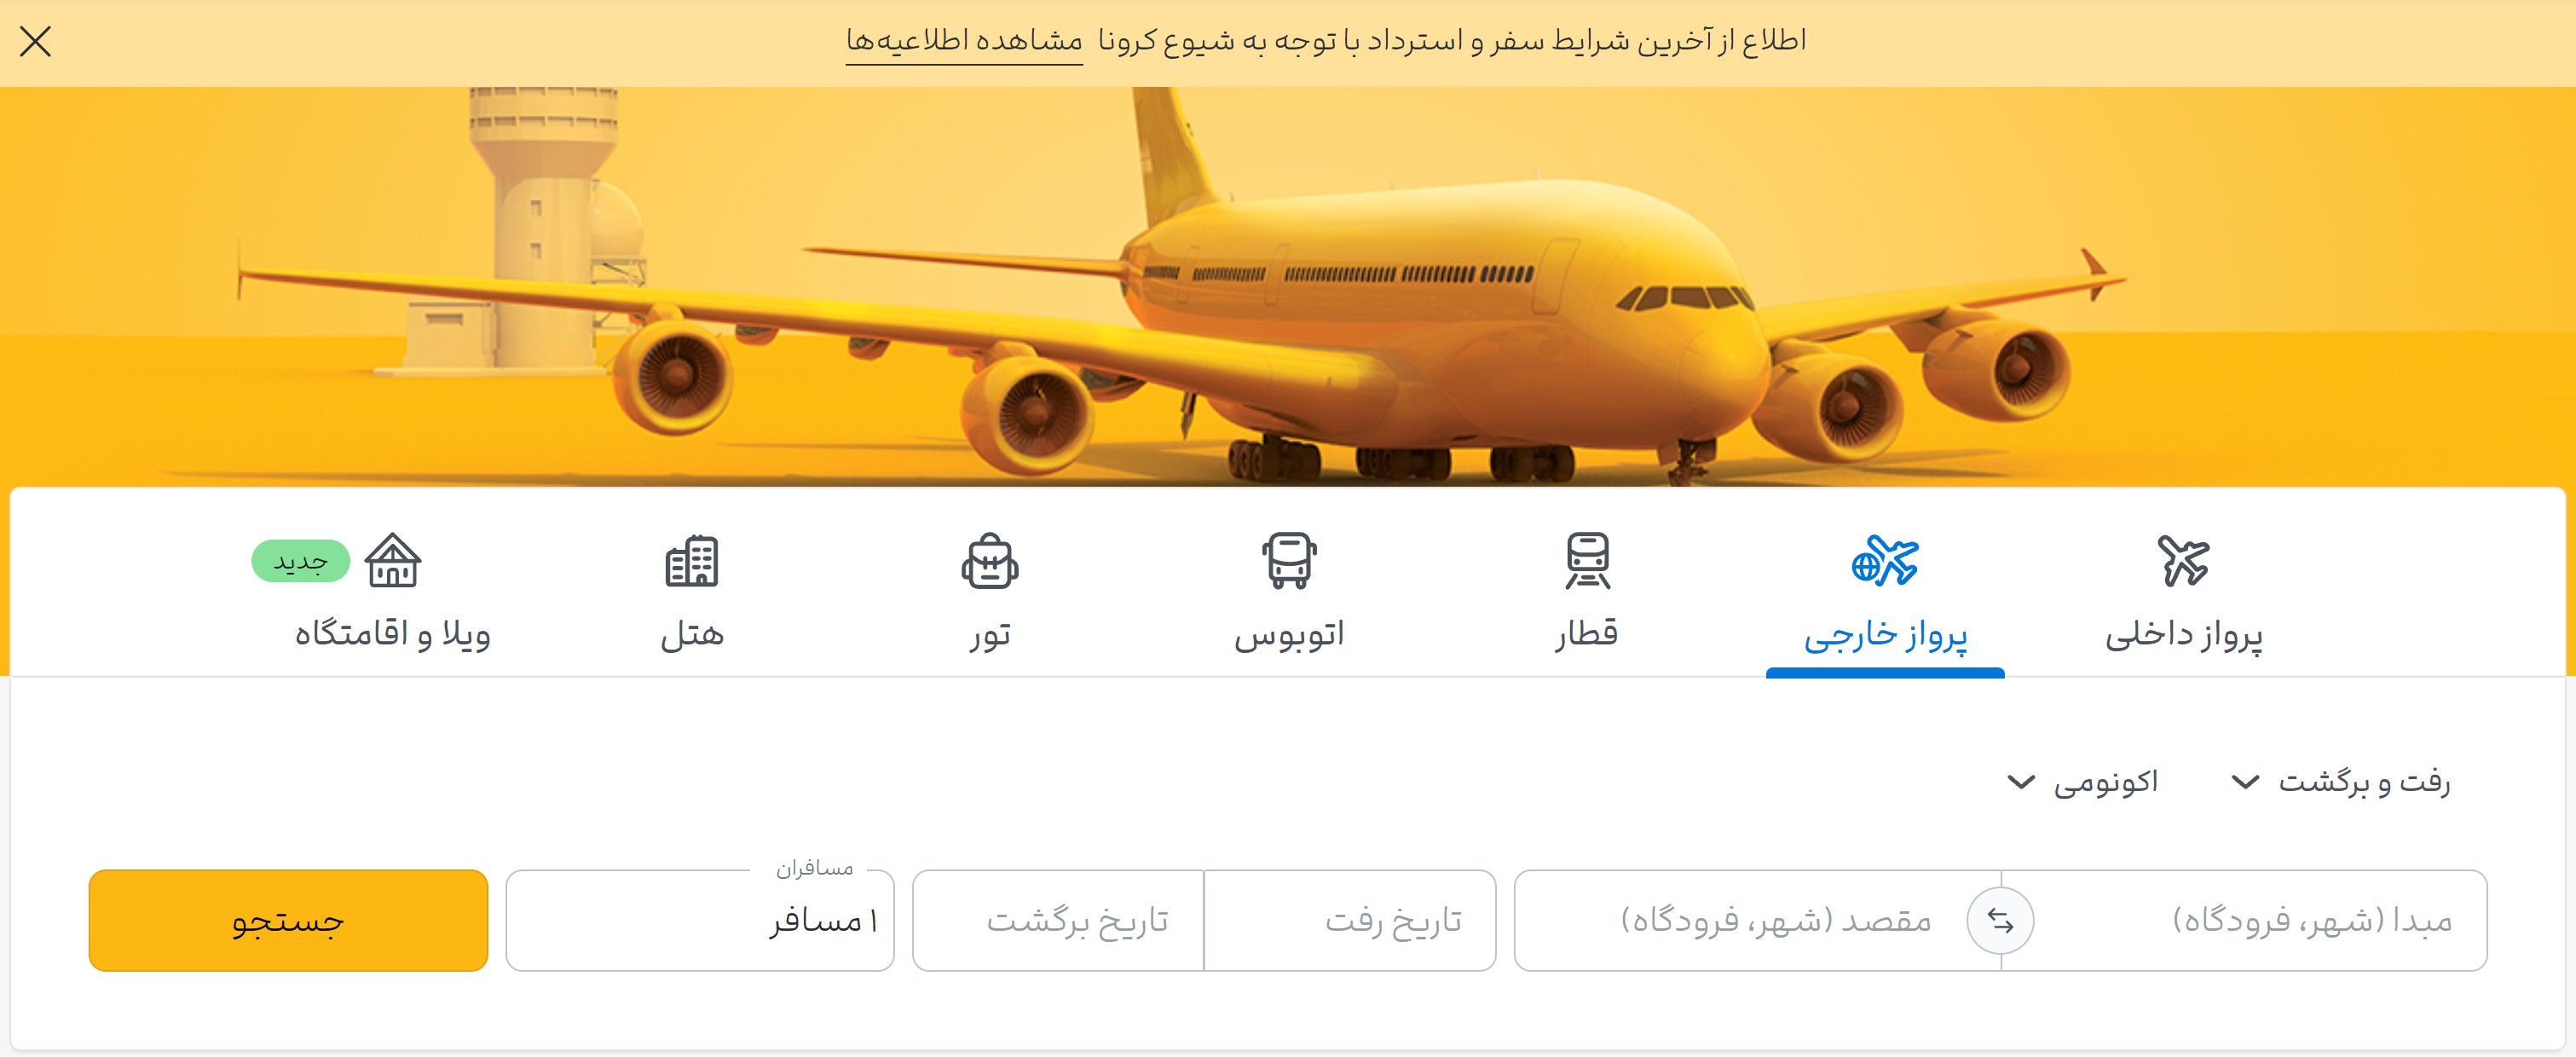

The code below introduces 3 new concepts, ```find_elements``` which is the equivalent of ```find_all``` in Beautiful Soup, scrolling which is done by executing JavaScript codes, & using the mouse, which is done by ActionChains.

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd


driver = webdriver.Chrome()
driver.get('https://www.alibaba.ir/iranout')
driver.maximize_window()


origin_city = 'tehran'
destination_city = 'copenhagen'

foreign_flights_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.mb-6.text-center > ul > li.is-active > a'
which_way_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.items-stretch.justify-start.mb-5 > span:nth-child(1) > button'
one_way_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.items-stretch.justify-start.mb-5 > span:nth-child(1) > div > div > ul > li:nth-child(1) > a'
origin_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.a-input-group.is-horizontal.relative.mb-0 > div.a-input.is-first.is-lg > span > input'
origin_dropdown_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.v-dropdown.pretty-scroll.is-open > div > ul > li:nth-child(1) > a'
destination_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.a-input-group.is-horizontal.relative.mb-0 > div.a-input.is-last.is-lg > span > input'
destination_dropdown_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(1) > div > div.v-dropdown.pretty-scroll.is-open > div > ul > li:nth-child(1) > a'
date_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div.relative > div > div.v-dropdown.pretty-scroll.is-open > div > div.a-card__body.relative > div > div > div.datepicker-slide.lg\:-mx-2 > div:nth-child(2) > div > span:nth-child(24)'
date_btn_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div.relative > div > div.v-dropdown.pretty-scroll.is-open > div > div.a-card__footer.flex.justify-between.items-center.py-2 > button'

search_btn_css = '#app > div.wrapper > main > div > div.a-container.px-0.pb-8 > div.a-card.homepage-omnibox-card > div.tab-view.z-10 > div > form > div.flex.w-full.justify-center > div:nth-child(4) > button'

loading_screen_css = 'div.loading-banner'

available_flights_css = '#app > div.wrapper > main > div > div > section > div:nth-child(4) > div'

airline_class = 'airline-name'
departure_css = 'div.available-card__details > div > div.flex > div.available-card-route > div > div:nth-child(1)'
arrival_css = 'div.available-card__details > div > div.flex > div.available-card-route > div > div:nth-child(3)'
price_class = 'text-secondary-400'
flight_duration_css = 'div.available-card__details > div.flex.flex-1.items-center.mb-2 > div.available-card-route.flex-grow > div.flex.w-full.items-center > span > span.stops__label'
flight_number_css = 'div.available-card__details > div.-mx-4.mt-1 > div > div > div > div > div:nth-child(1) > div.flex.w-full.mt-4 > div > div.mt-3 > span:nth-child(1) > span'


waits = WebDriverWait(driver, 10)
search_waits = WebDriverWait(driver, 100)


# Fill the form
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, foreign_flights_css))).click()
time.sleep(1)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, which_way_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, one_way_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, origin_css))).send_keys(origin_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, origin_dropdown_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, destination_css))).send_keys(destination_city)
time.sleep(2)
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, destination_dropdown_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, date_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, date_btn_css))).click()
waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, search_btn_css))).click()


# Wait until the search has finished
search_waits.until(EC.visibility_of_element_located((By.CSS_SELECTOR, loading_screen_css)))
search_waits.until(EC.invisibility_of_element((By.CSS_SELECTOR, loading_screen_css)))


# Scroll down to fetch all data
speed = 50
current_scroll_position, new_height = 0, 1
while current_scroll_position < new_height:
    time.sleep(0.1)
    current_scroll_position += speed
    # JavaScript code to scroll to a position
    driver.execute_script("window.scrollTo(0, {});".format(current_scroll_position))
    # Javascript code to return page height
    new_height = driver.execute_script("return document.body.scrollHeight")



# Loop over flights
flights = driver.find_elements_by_css_selector(available_flights_css)

airlines = []
departures = []
arrivals = []
prices = []
durations = []
flight_numbers = []

for flight in flights:
    
    # Initial info
    time.sleep(0.5)
    airlines.append(flight.find_element_by_class_name(airline_class).text)
    departures.append(flight.find_element_by_css_selector(departure_css).text)
    arrivals.append(flight.find_element_by_css_selector(departure_css).text)
    prices.append(flight.find_element_by_class_name(price_class).text)

    # Click to see more details
    flight.click()
    time.sleep(1)
    durations.append(waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, flight_duration_css))).text)
    flight_numbers.append(waits.until(EC.element_to_be_clickable((By.CSS_SELECTOR, flight_number_css))).text)

    # Click away from the popup window
    webdriver.ActionChains(driver).move_by_offset(0, 0).double_click().perform()
        
driver.close()


# Write data to CSV
product = {'Airline': airlines, 
           'Departure': departures, 
           'Arrival': arrivals, 
           'Price': prices, 
           'Duration': durations, 
           'Flight_num': flight_numbers}

data = pd.DataFrame.from_dict(product, orient='index')
data = data.transpose()
data.to_csv('alibaba_flights.csv', index=False)
data.head()

Airline           Departure             Arrival        Price  \
0          Austrian  03:45\nتهران (IKA)  03:45\nتهران (IKA)  233,171,770   
1  Turkish Airlines  07:55\nتهران (IKA)  07:55\nتهران (IKA)  104,334,191   
2  Turkish Airlines  06:30\nتهران (IKA)  06:30\nتهران (IKA)  104,334,191   
3  Turkish Airlines  03:15\nتهران (IKA)  03:15\nتهران (IKA)  104,334,191   
4  Turkish Airlines  02:05\nتهران (IKA)  02:05\nتهران (IKA)  104,334,191   

             Duration Flight_num  
0   7 ساعت و 50 دقیقه        872  
1   7 ساعت و 45 دقیقه        879  
2   9 ساعت و 10 دقیقه        873  
3   9 ساعت و 40 دقیقه        875  
4  10 ساعت و 50 دقیقه        881

<hr />

In [37]:
df = pd.read_csv('alibaba_flights.csv')
df

Airline           Departure             Arrival        Price  \
0           Austrian  03:45\nتهران (IKA)  03:45\nتهران (IKA)  116,495,915   
1            Pegasus  04:15\nتهران (IKA)  04:15\nتهران (IKA)   56,772,452   
2      Qatar Airways  04:45\nتهران (IKA)  04:45\nتهران (IKA)   86,684,090   
3      Qatar Airways  22:50\nتهران (IKA)  22:50\nتهران (IKA)   86,684,090   
4      Qatar Airways  15:05\nتهران (IKA)  15:05\nتهران (IKA)   87,525,090   
5           Emirates  04:30\nتهران (IKA)  04:30\nتهران (IKA)   94,808,080   
6           Emirates  11:05\nتهران (IKA)  11:05\nتهران (IKA)   94,808,080   
7        چند ایرلاین  00:50\nتهران (IKA)  00:50\nتهران (IKA)   95,336,080   
8        چند ایرلاین  15:10\nتهران (IKA)  15:10\nتهران (IKA)   95,336,080   
9        چند ایرلاین  04:45\nتهران (IKA)  04:45\nتهران (IKA)  101,194,860   
10       چند ایرلاین  22:50\nتهران (IKA)  22:50\nتهران (IKA)  101,194,860   
11       چند ایرلاین  22:50\nتهران (IKA)  22:50\nتهران (IKA)  102,470,860   
12       چند ایرلاین  04:45\nتهران (IKA)  04:45\nتهران (IKA)  102,470,860   
13       چند ایرلاین  04:45\nتهران (IKA)  04:45\nتهران (IKA)  103,082,860   
14  Turkish Airlines  03:15\nتهران (IKA)  03:15\nتهران (IKA)  103,086,911   
15  Turkish Airlines  02:05\nتهران (IKA)  02:05\nتهران (IKA)  103,086,911   
16  Turkish Airlines  07:55\nتهران (IKA)  07:55\nتهران (IKA)  103,086,911   
17  Turkish Airlines  06:30\nتهران (IKA)  06:30\nتهران (IKA)  103,086,911   
18        AnadoluJet  05:20\nتهران (IKA)  05:20\nتهران (IKA)  103,879,911   
19       چند ایرلاین  04:45\nتهران (IKA)  04:45\nتهران (IKA)  105,652,860   
20       چند ایرلاین  22:50\nتهران (IKA)  22:50\nتهران (IKA)  105,652,860   
21       چند ایرلاین  15:05\nتهران (IKA)  15:05\nتهران (IKA)  106,493,860   
22       چند ایرلاین  03:15\nتهران (IKA)  03:15\nتهران (IKA)  106,521,911   
23       چند ایرلاین  02:05\nتهران (IKA)  02:05\nتهران (IKA)  106,521,911   
24       چند ایرلاین  05:20\nتهران (IKA)  05:20\nتهران (IKA)  107,843,911   
25        AnadoluJet  04:00\nتهران (IKA)  04:00\nتهران (IKA)  113,560,911   
26        AnadoluJet  03:50\nتهران (IKA)  03:50\nتهران (IKA)  113,560,911   
27       چند ایرلاین  04:00\nتهران (IKA)  04:00\nتهران (IKA)  114,882,911   
28       چند ایرلاین  04:00\nتهران (IKA)  04:00\nتهران (IKA)  114,882,911   
29       چند ایرلاین  03:50\nتهران (IKA)  03:50\nتهران (IKA)  114,882,911   
30       چند ایرلاین  03:50\nتهران (IKA)  03:50\nتهران (IKA)  114,882,911   
31         Lufthansa  02:30\nتهران (IKA)  02:30\nتهران (IKA)  124,144,815   
32         Lufthansa  02:30\nتهران (IKA)  02:30\nتهران (IKA)  127,548,815   
33       چند ایرلاین  02:30\nتهران (IKA)  02:30\nتهران (IKA)  135,406,165   
34         Lufthansa  02:30\nتهران (IKA)  02:30\nتهران (IKA)  138,665,165   
35         Lufthansa  02:30\nتهران (IKA)  02:30\nتهران (IKA)  142,069,165   
36         Lufthansa  02:30\nتهران (IKA)  02:30\nتهران (IKA)  145,080,005   
37       چند ایرلاین  22:50\nتهران (IKA)  22:50\nتهران (IKA)  151,617,750   
38       چند ایرلاین  22:50\nتهران (IKA)  22:50\nتهران (IKA)  165,007,490   
39       چند ایرلاین  04:45\nتهران (IKA)  04:45\nتهران (IKA)  165,007,490   
40       چند ایرلاین  02:30\nتهران (IKA)  02:30\nتهران (IKA)  179,970,036   
41       چند ایرلاین  02:30\nتهران (IKA)  02:30\nتهران (IKA)  184,329,774   
42       چند ایرلاین  02:30\nتهران (IKA)  02:30\nتهران (IKA)  207,416,988   
43       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  535,682,830   
44       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  537,283,830   
45       چند ایرلاین  02:30\nتهران (IKA)  02:30\nتهران (IKA)  543,232,860   
46       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  546,456,830   
47       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  546,905,830   
48       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  547,252,830   
49       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  547,513,830   
50       چند ایرلاین  03:45\nتهران (IKA)  03:45\nتهران (IKA)  547,574,830   
51       

<hr />

This is good! But you know what would be better? Crawling the same information from <b>[Mrbilit](mrbilit.com)</b> & comparing the prices of these websites! 

## Crawling Mrbilit
<a name="Task3:crawl"></a>

- Write code to open Mrbilit, Enter the same information, (one way ticket from tehran to the same destination on the same day) & crawl the same information for all available tickets (Airline, Departure time & airport, Arrival time & airport, Price, Duration, & Flight number). note that by flight number, I mean the number of the first flight in flights with stops. Good luck!

In [ ]:
'''Enter your code here'''

<hr />

## <b><span style="color:green">Extra Score: Cleaning & Joining the tables 
<a name="Task3:clean"></a>

- By cleaning & joining the tables, create one final table containing these columns:
 - Airline, Departure_time, Departure_airport, Arrival_time, Arrival_airport, Duration, Flight_number, Alibaba_price, MrBilit_price
- If one of the websites, does not include a ticket, fill its price value with NaN
- Output the first 5 rows & description of the new table

<b><span style="color:red">Note that in case of flights with stops, Flight_number by itself cannot be used as a key, so I recommend joining the tables by more than one column
</span></b>


In [ ]:
'''Enter your code here'''

<hr />

<a name="Task2:plot"></a>

- Show and compare the prices of the tickets that exist on both websites. Is any of the websites generally cheaper?

In [ ]:
'''Enter your code here'''

<hr />

- Using <b>Matplotlib</b>, plot a bar chart, showing the average prices of both websites in each hour of departure. X-Axis should be the hours of the day (0 to 24). Y-Axis should be price.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

'''Enter your code here'''

'Enter your code here'

<hr />
<hr />

<span style="color:green">
Get crawling! but always treat the data & its owners with respect. There are a number of online articles about <b>ethics of crawling</b>. Check them out if you are interested. :) 
</span>

<hr />
<hr />